In [171]:
# 호기별 고장주기(데이터가 1년간의 제한적인 기간이므로 설치일자랑은 상관없을듯)
# 각 조치를 취했을 때 다음 고장까지 걸리는 시간
# 가장 오랫동안 고장이 안난 조치, 이때 사용된 부품 등

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [173]:
df=pd.read_excel('통합 문서1.xlsx',header=1)
df.head()

,엘리베이터 호기,엘리베이터 기종,설치일자,고장일시,고장내용,조치부품,처리결과
0,002094L03,BAXVF,0000-00-00,2019-06-27 05:39:09,카 내부 버튼 불량,IN CAR and OPB-CLOSE BUTTON,교체
1,002094L04,BAXVF,0000-00-00,2019-06-18 08:18:29,카 내부 버튼 불량,INDICATOR and 승장버튼-HALL DOWN BUTTON (HPB DOWN),교체
2,002094L04,BAXVF,0000-00-00,2019-06-21 09:49:12,정지,HALL DOOR-HALL DOOR SILL,제거
3,002399L01,BAXVF,0000-00-00,2019-06-04 06:58:03,운행중정지,HALL DOOR-HALL DOOR SILL,제거
4,002399L04,BAXVF,0000-00-00,2019-06-13 19:26:12,정지,INDICATOR and 승장버튼-기타,확인 및 점검


In [174]:
df['엘리베이터 기종'].unique() # 기종이 뭐가있나 파악

array(['BAXVF', '2PZ'], dtype=object)

In [197]:
df1=df[df['엘리베이터 기종']=='BAXVF'] # 분석하고자하는 기종선택 ★★★★★★★
df1.head()

,엘리베이터 호기,엘리베이터 기종,설치일자,고장일시,고장내용,조치부품,처리결과
0,002094L03,BAXVF,0000-00-00,2019-06-27 05:39:09,카 내부 버튼 불량,IN CAR and OPB-CLOSE BUTTON,교체
1,002094L04,BAXVF,0000-00-00,2019-06-18 08:18:29,카 내부 버튼 불량,INDICATOR and 승장버튼-HALL DOWN BUTTON (HPB DOWN),교체
2,002094L04,BAXVF,0000-00-00,2019-06-21 09:49:12,정지,HALL DOOR-HALL DOOR SILL,제거
3,002399L01,BAXVF,0000-00-00,2019-06-04 06:58:03,운행중정지,HALL DOOR-HALL DOOR SILL,제거
4,002399L04,BAXVF,0000-00-00,2019-06-13 19:26:12,정지,INDICATOR and 승장버튼-기타,확인 및 점검


In [198]:
print(df1['엘리베이터 기종'].unique()) # 그냥한번 표시해줌
print('위 기종의 총 고장횟수:',len(df1)) # 해당기종의 1년간 총고장횟수 파악
elevator_id_list = df1.loc[:,"엘리베이터 호기"].unique()
print('위 기종의 설치댓수:',len(elevator_id_list)) # 해당기종의 설치댓수 파악
print('1년간 엘리베이터 한대의 평균고장횟수:', len(df1)/len(elevator_id_list)) # 각 엘리베이터별 1년간 대략적인 고장횟수

['BAXVF']
위 기종의 총 고장횟수: 517
위 기종의 설치댓수: 97
1년간 엘리베이터 한대의 평균고장횟수: 5.329896907216495


[7, 16, 3, 6, 8, 2, 3, 8, 2, 4, 7, 4, 8, 12, 11, 12, 4, 8, 1, 1, 7, 12, 4, 13, 19, 11, 30, 12, 8, 13, 13, 1, 5, 1, 6, 1, 4, 7, 3, 15, 10, 3, 3, 1, 9, 2, 2, 3, 5, 5, 2, 2, 7, 1, 5, 3, 1, 1, 8, 3, 4, 2, 10, 6, 12, 3, 7, 3, 3, 1, 4, 1, 2, 2, 2, 7, 3, 4, 3, 1, 1, 1, 1, 7, 1, 1, 6, 1, 7, 8, 8, 2, 1, 1, 1, 1, 1]


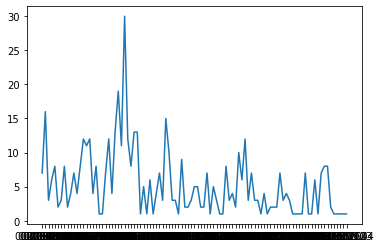

In [199]:
p=[]
for i in range(len(elevator_id_list)):
  k=df[df['엘리베이터 호기']==elevator_id_list[i]]['고장일시']
  p.append(len(k))
print(p) # 각 엘리베이터별 1년간 실제 고장횟수
plt.plot(elevator_id_list,p)
plt.show()

In [200]:
#-------------------------각 엘리베이터별 1년간 고장횟수↑
#-------------------------각 엘리베이터별 1년간 고장간격↓

In [201]:
len(elevator_id_list) # 해당 기종의 엘리베이터 설치댓수

97

In [202]:
c=elevator_id_list[9] # 알고자 하는 엘리베이터 호기 ★★★★★★★
erorr_list=[]
a=df1[df1['엘리베이터 호기']==c]
for i in range(len(a)):
  erorr_list.append(df1[df1['엘리베이터 호기']==c].iloc[i,3])
erorr_list   # 각 엘리베이터 호기별 고장일시  

['2019-06-19 19:25:14',
 '2019-08-08 22:11:20',
 '2019-09-03 17:08:03',
 '2019-09-23 09:39:55']

In [203]:
e=[]
for i in range(len(erorr_list)):
  e.append(dt.strptime(erorr_list[i],'%Y-%m-%d %H:%M:%S'))
e

[datetime.datetime(2019, 6, 19, 19, 25, 14),
 datetime.datetime(2019, 8, 8, 22, 11, 20),
 datetime.datetime(2019, 9, 3, 17, 8, 3),
 datetime.datetime(2019, 9, 23, 9, 39, 55)]

In [204]:
m=[]
for i in range(len(e)-1):
  m.append(str(e[i+1]-e[i]))
m

['50 days, 2:46:06', '25 days, 18:56:43', '19 days, 16:31:52']